Best Model Performance:
Test Accuracy: 0.92
Test Mean Squared Error: 0.08
Area Under Precision-Recall Curve (AUC-PR): 0.95
Feature Importances:
            Feature  Importance
2               BMI    0.159554
7     CancerHistory    0.158578
6     AlcoholIntake    0.144663
5  PhysicalActivity    0.140344
4       GeneticRisk    0.132260
0               Age    0.132050
1            Gender    0.074140
3           Smoking    0.058412


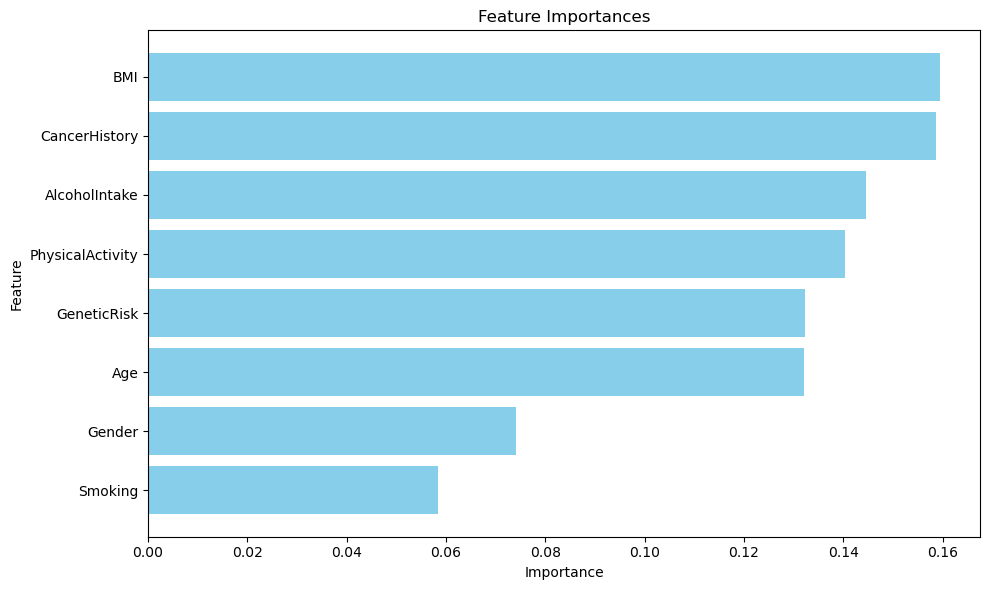

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
import joblib  # For saving and loading models

# Read the CSV file in the same directory as the code
data = pd.read_csv('../data/The_Cancer_data_1500_V2.csv')

# Separate features and target
X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the best parameter grid for Random Forest
param_grid_rf = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Random Forest
random_forest = RandomForestClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=0,  # Suppress output
    scoring='accuracy'  # Metric for evaluation
)

# Fit the GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Calculate metrics for the best RF model on the test set
y_pred_best_rf = best_rf.predict(X_test)
accuracy_test_best_rf = accuracy_score(y_test, y_pred_best_rf)
classification_report_test_best_rf = classification_report(y_test, y_pred_best_rf)
mse_test_best_rf = mean_squared_error(y_test, y_pred_best_rf)

# Generate prediction probabilities for Precision-Recall Curve
y_pred_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_best_rf)

# Calculate the Area Under the Precision-Recall Curve
auc_pr = auc(recall, precision)

# Save the best model to a file
joblib.dump(best_rf, './best_random_forest_model.joblib')

# Display final metrics
print("Best Model Performance:")
print(f"Test Accuracy: {accuracy_test_best_rf:.2f}")
print(f"Test Mean Squared Error: {mse_test_best_rf:.2f}")
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.2f}")


